In [131]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import Sequential,layers
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [147]:
'''When we have number data ,we cant do direct ,we have to do preprocessing befor nn as ,values can be anytype'''

'When we have number data ,we cant do direct ,we have to do preprocessing befor nn as ,values can be anytype'

In [214]:

d=datasets.load_breast_cancer()
# d.target


In [149]:
df=pd.DataFrame(d.data,columns=d.feature_names)
df['label']=d.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [144]:
df.isnull().sum(),df.duplicated().sum()

(mean radius                0
 mean texture               0
 mean perimeter             0
 mean area                  0
 mean smoothness            0
 mean compactness           0
 mean concavity             0
 mean concave points        0
 mean symmetry              0
 mean fractal dimension     0
 radius error               0
 texture error              0
 perimeter error            0
 area error                 0
 smoothness error           0
 compactness error          0
 concavity error            0
 concave points error       0
 symmetry error             0
 fractal dimension error    0
 worst radius               0
 worst texture              0
 worst perimeter            0
 worst area                 0
 worst smoothness           0
 worst compactness          0
 worst concavity            0
 worst concave points       0
 worst symmetry             0
 worst fractal dimension    0
 label                      0
 dtype: int64,
 0)

In [150]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'label'],
      dtype='object')

In [157]:
# df.label
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()
cols=['mean radius', 'mean texture', 'mean perimeter','mean area','worst perimeter','worst area',]
df[cols]=m.fit_transform(df[cols])
df['radius error']

0      1.0950
1      0.5435
2      0.7456
3      0.4956
4      0.7572
        ...  
564    1.1760
565    0.7655
566    0.4564
567    0.7260
568    0.3857
Name: radius error, Length: 569, dtype: float64

In [146]:
df.shape

(569, 31)

In [159]:
x=df.drop('label',axis=1)
y=df.label
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)#eandom_state tell the way in which data is splitted and also to get same result everytime werun data

In [161]:
len(x_train),x_train.shape

(455, (455, 30))

In [165]:
len(y_test),y_test.shape

(114, (114,))

In [194]:
model=Sequential([
    layers.Dense(20,input_shape=(30,),activation='relu'),
     layers.Dense(10,activation='relu'),
     layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=100)

Epoch 1/100


C:\Users\sahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3506 - loss: 2.5832
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2927 - loss: 1.4173
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5770 - loss: 0.7384
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7562 - loss: 0.5527
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7736 - loss: 0.5016 
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7890 - loss: 0.4615 
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8081 - loss: 0.4225
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7828 - loss: 0.4500
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7783 - loss: 0.4870
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8113 - loss: 0.4424
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7804 - loss: 0.4844
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8028 - 

In [195]:
model.evaluate(x_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9473 - loss: 0.1150  


[0.11606256663799286, 0.9385964870452881]

In [196]:
pred=model.predict(x_test)
y_pred=[1 if i>0.5 else 0 for i in pred]
y_pred[:10]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


[1, 0, 0, 1, 1, 0, 0, 0, 1, 1]

In [197]:
y_test[:10]

204    1
70     0
131    0
431    1
540    1
567    0
369    0
29     0
81     1
477    1
Name: label, dtype: int32

In [198]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        43
           1       0.97      0.93      0.95        71

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



In [199]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[41,  2],
       [ 5, 66]])>

Text(50.722222222222214, 0.5, 'truth')

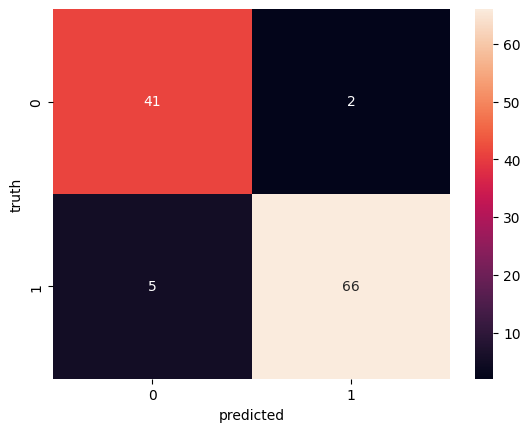

In [200]:
import seaborn as sn
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

In [215]:
'''1=benign,0=malignant'''

'1=benign,0=malignant'

In [205]:
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))
print(history.history['loss'])
print(history.history['accuracy'])

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9604 - loss: 0.1252 - val_accuracy: 0.9474 - val_loss: 0.1185
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9652 - loss: 0.1095 - val_accuracy: 0.9561 - val_loss: 0.1089
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9720 - loss: 0.1136 - val_accuracy: 0.9561 - val_loss: 0.1154
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9628 - loss: 0.1115 - val_accuracy: 0.9474 - val_loss: 0.1163
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9635 - loss: 0.1255 - val_accuracy: 0.9649 - val_loss: 0.1012
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9663 - loss: 0.0996 - val_accuracy: 0.9561 - val_loss: 0.1079
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9536 - loss: 0.1294 - val_accuracy: 0.9474 - val_loss: 0.1146
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9491 - loss: 0.1213 - val_accuracy: 0.964